In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [17]:
june = list()
for year in range(2010, 2018):
    results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=f"{year}-06-01").filter(Measurement.date<=f"{year}-06-30").all()
    june += results
        
june = pd.DataFrame(june, columns=["date", "June Temps"])
june.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [18]:
december = list()
for year in range(2010, 2018):
    results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=f"{year}-12-01").filter(Measurement.date<=f"{year}-12-31").all()
    december += results
        
december = pd.DataFrame(december, columns=["date", "December Temps"])
december.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:xlabel='date', ylabel='December Temps'>

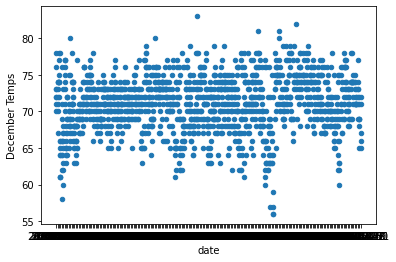

In [22]:
december.plot(x="date", y="December Temps", kind="scatter")

<AxesSubplot:xlabel='date', ylabel='June Temps'>

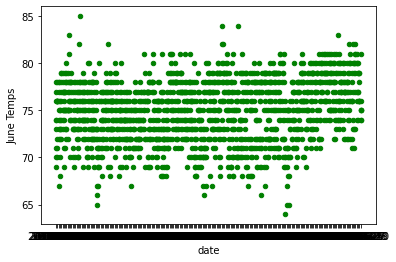

In [23]:
june.plot(x="date", y="June Temps", kind="scatter", color='green')